# Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import imp # python's import helper
df = pd.read_csv("/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/Text Mining BZAN 557 671/Project/Complaints/complaints_processed.csv")
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162410,162410,credit_reporting,zales comenity bank closed sold account report...
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


# Change Product Names to Integers for Faster Processing

In [2]:
df['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [3]:
product_dict = {'credit_reporting': 0, 'debt_collection': 1, 'mortgages_and_loans': 2, 'credit_card': 3, 'retail_banking': 4}
df['product'].replace(product_dict, inplace=True)

In [4]:
df["product"].unique()

array([3, 4, 0, 2, 1])

# Test-Train Split

In [5]:
from sklearn.model_selection import train_test_split
X = df["narrative"].values.astype("U").tolist()
y = df['product'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [6]:
X_train[0:5]

['informed several occasion least time major bureau equifax name address telephone employer appear credit report following address',
 'asked experian remove old address phone number connected current credit history repeatedly denied request also since calling providing current living address started mail report prior address informed live anymore still send information address considered breach personal information sending personal information someone else refuse use current address feel could affect livelihood called customer service extremely rude unhelpful ask take old address contact information use current information person phone added current address nothing else asked take got snappy kept cutting dispute month sent letter current address identity confirmation claim enough right request removal old information denied appreciate ignoring concern request',
 'transunion sending affidavit federal trade commission state student loan fraudulent mine ftc advice close account due identi

In [33]:
y_train[0:5]

[0, 0, 0, 0, 1]

# TF-IDF
See https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.
I am using `ngram_range = (1,2)` to use unigram and bigrams for the analysis.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vect_X_train = vectorizer.fit_transform(X_train)
feature_names =  vectorizer.get_feature_names()

In [8]:
feature_names[0:5]

['abide', 'ability', 'ability consumer', 'ability obtain', 'able']

In [9]:
vect_X_train.shape

(113690, 10000)

Since I have already fit the model on the training data, I want to fit it on test data using `transform()`.

In [10]:
vect_X_test = vectorizer.transform(X_test)

# Modelling

## Multinomial NB (Softmax) Regression

In [44]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(vect_X_train, y_train)

MultinomialNB()

In [45]:
# saving predictions
y_pred = cls.predict(vect_X_train)

In [50]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score, plot_confusion_matrix
accuracy_score(y_train, y_pred)

0.8356055941595567

The model has a accuracy of 84% on training data.

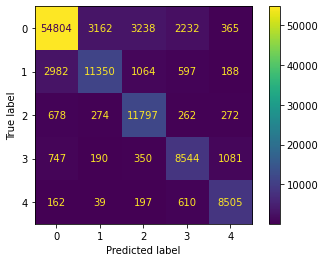

In [55]:
plot_confusion_matrix(cls, vect_X_train, y_train)

In [61]:
recall_score(y_train, y_pred, average = "weighted")

0.8356055941595567

### Checking for test data

In [59]:
test_y_pred = cls.predict(vect_X_test)
accuracy_score(y_test, test_y_pred)

0.832939969214982

In [60]:
recall_score(y_test, test_y_pred, average='weighted')

0.832939969214982

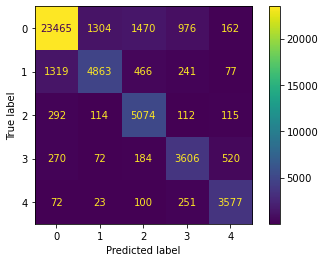

In [62]:
plot_confusion_matrix(cls, vect_X_test, y_test)

The model doesn't perform worse or better on test data than training data. Thus, there is no overfitting.

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rdmfst = RandomForestClassifier(max_depth=20)
rdmfst.fit(vect_X_train, y_train)

RandomForestClassifier(max_depth=20)

In [65]:
y_pred = rdmfst.predict(vect_X_train)

In [66]:
# accuracy
accuracy_score(y_train, y_pred)

0.7977834462133873

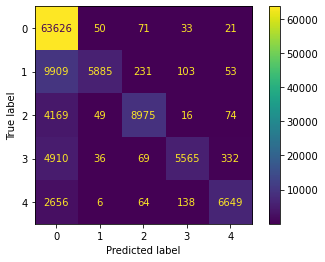

In [69]:
plot_confusion_matrix(rdmfst, vect_X_train, y_train)

In [70]:
test_y_pred = rdmfst.predict(vect_X_test)
accuracy_score(y_test, test_y_pred)

0.7618471010774757

# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance')
neigh.fit(vect_X_train, y_train)

KNeighborsClassifier(weights='distance')

In [73]:
y_pred = neigh.predict(vect_X_train)

In [74]:
accuracy_score(y_train, y_pred)

0.9949511830416043

The model has a freakish 99% accuracy on training dataset.

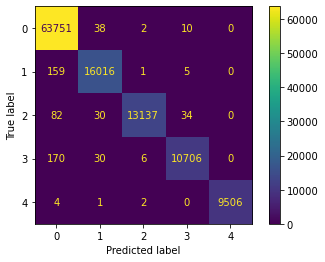

In [75]:
plot_confusion_matrix(neigh, vect_X_train, y_train)

In [76]:
test_y_pred = neigh.predict(vect_X_test)
accuracy_score(y_test, test_y_pred)

0.6431811185223192

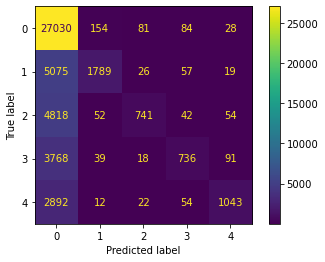

In [77]:
plot_confusion_matrix(neigh, vect_X_test, y_test)